# CASE STUDY: FASHION CLASS CLASSIFICATION 

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

In [10]:
    # Importing Data


# Import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [11]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/yeji-park/Downloads


In [12]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv", sep = ',')

In [13]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [14]:
    # Visualizing the Dataset 

fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
training = np.array(fashion_train_df, dtype = 'float32')

In [16]:
testing = np.array(fashion_test_df, dtype = 'float32')

6.0

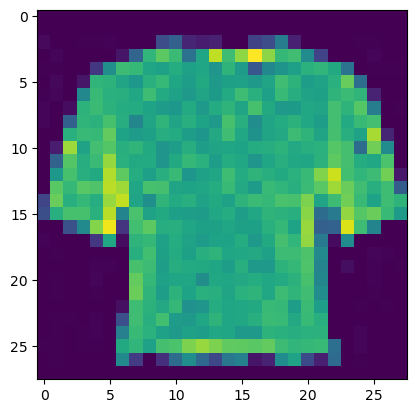

In [17]:
# View the image randomly
# We need to reshape the data into 28x28 to show matrix image 
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0] # Indicate what class is the image in
label

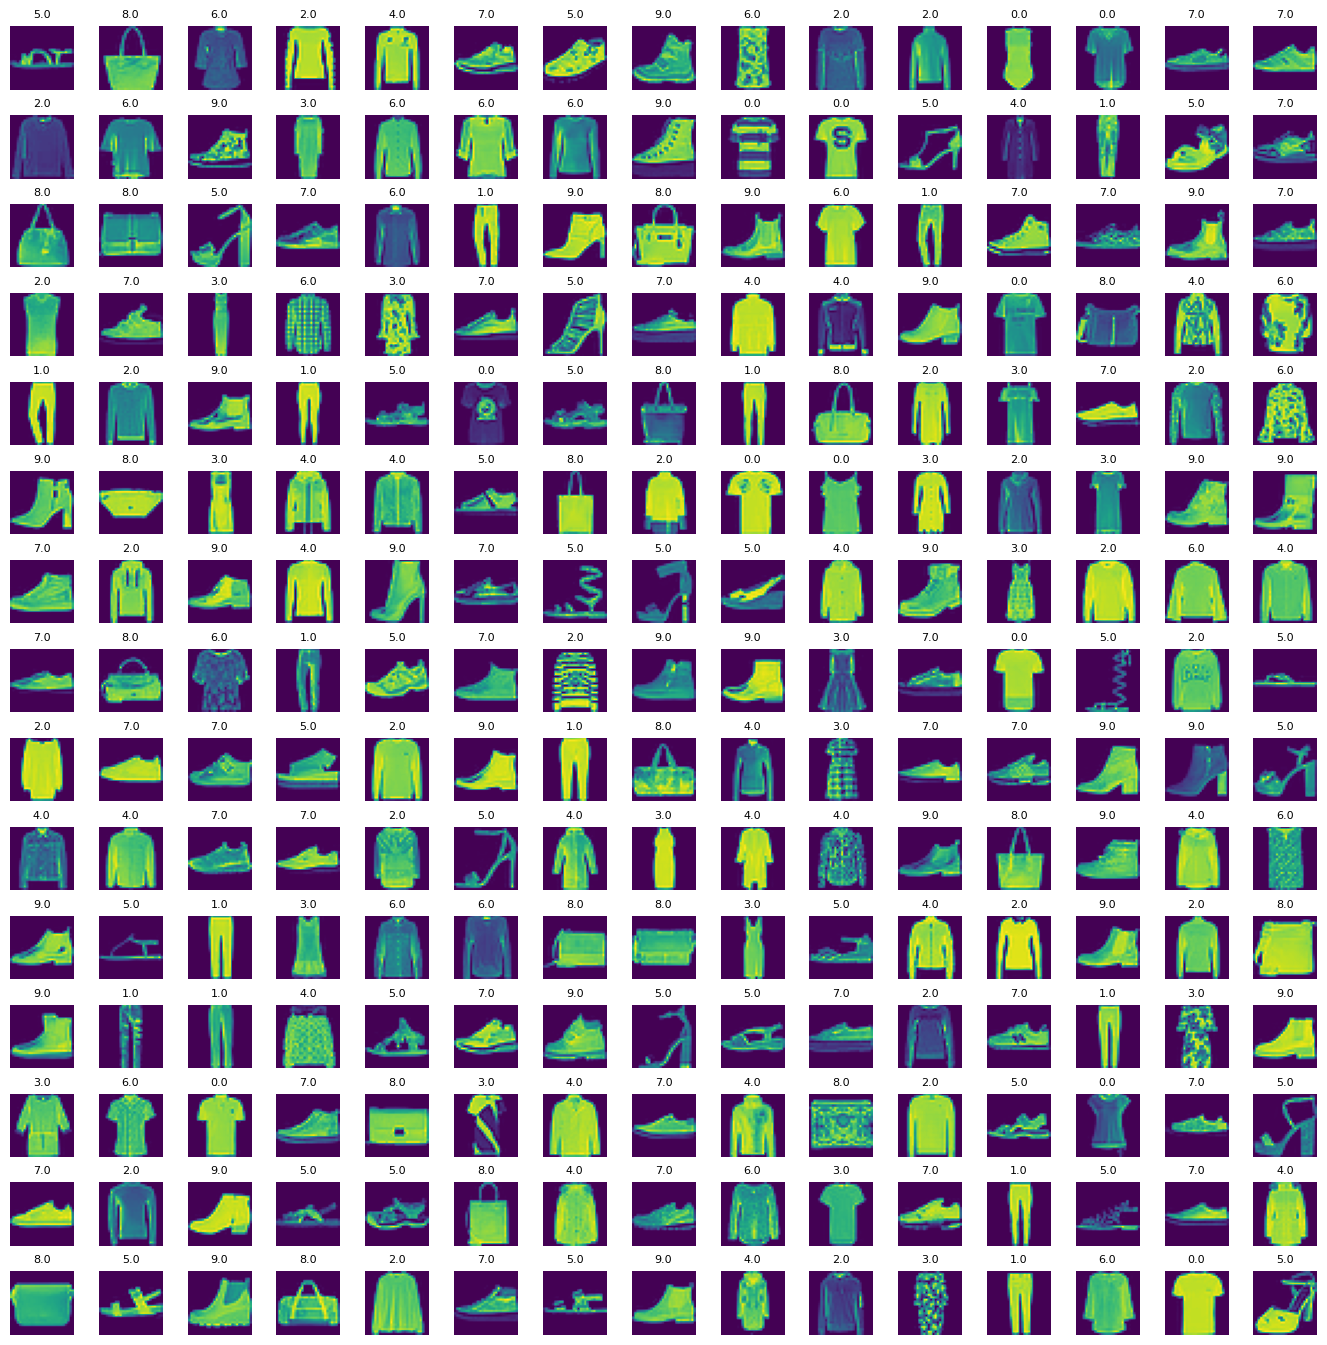

In [18]:
# View more images in a grid format

# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

In [19]:
    # Training the Model

# Divid by 255 for normalization
X_train = training[:,1:]/255
y_train = training[:,0]

In [20]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [21]:
# Validation Dataset - help to generalize, to avoid overfitting
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [22]:
# Reshape the data to image format to fit all our images to CNN
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [23]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()
# Building Convolutional Layer
cnn_model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))
# Builiding Maxpooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
# Flattening model
cnn_model.add(Flatten())
# Adding Dense Function
cnn_model.add(Dense(units = 32, activation = 'relu'))
# Output Layer
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [25]:
# Compiling the Method 
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy']);

In [26]:
# Fitting the model
from keras.utils import to_categorical

epochs = 50
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))


Epoch 1/50
94/94 [==============================] - 1s 9ms/step - loss: 1.2263 - accuracy: 0.5887 - val_loss: 0.7043 - val_accuracy: 0.7446
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.6372 - accuracy: 0.7690 - val_loss: 0.5844 - val_accuracy: 0.7872
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5567 - accuracy: 0.7974 - val_loss: 0.5334 - val_accuracy: 0.8100
Epoch 4/50
94/94 [==============================] - 1s 11ms/step - loss: 0.5137 - accuracy: 0.8123 - val_loss: 0.4988 - val_accuracy: 0.8227
Epoch 5/50
94/94 [==============================] - 1s 14ms/step - loss: 0.4819 - accuracy: 0.8257 - val_loss: 0.4759 - val_accuracy: 0.8310
Epoch 6/50
94/94 [==============================] - 1s 15ms/step - loss: 0.4628 - accuracy: 0.8315 - val_loss: 0.4708 - val_accuracy: 0.8300
Epoch 7/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4462 - accuracy: 0.8371 - val_loss: 0.4503 - val_accuracy: 0.8381
Epoch 8/50
94/94

In [27]:
    # Evaluating the Model

evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

# During Training I reached 0.8871 accuracy
# During Testing I reached 0.877 accuracy 

313/313 [==============================] - 0s 671us/step - loss: 0.3230 - accuracy: 0.8822
Test Accuracy : 0.882


In [28]:
# predicted_classes = cnn_model.predict_classes(X_test)
predictions = cnn_model.predict(X_test)

# Extracting predicted classes
predicted_classes = predictions.argmax(axis=-1)
predicted_classes

313/313 [==============================] - 0s 548us/step


array([0, 1, 2, ..., 8, 8, 1])

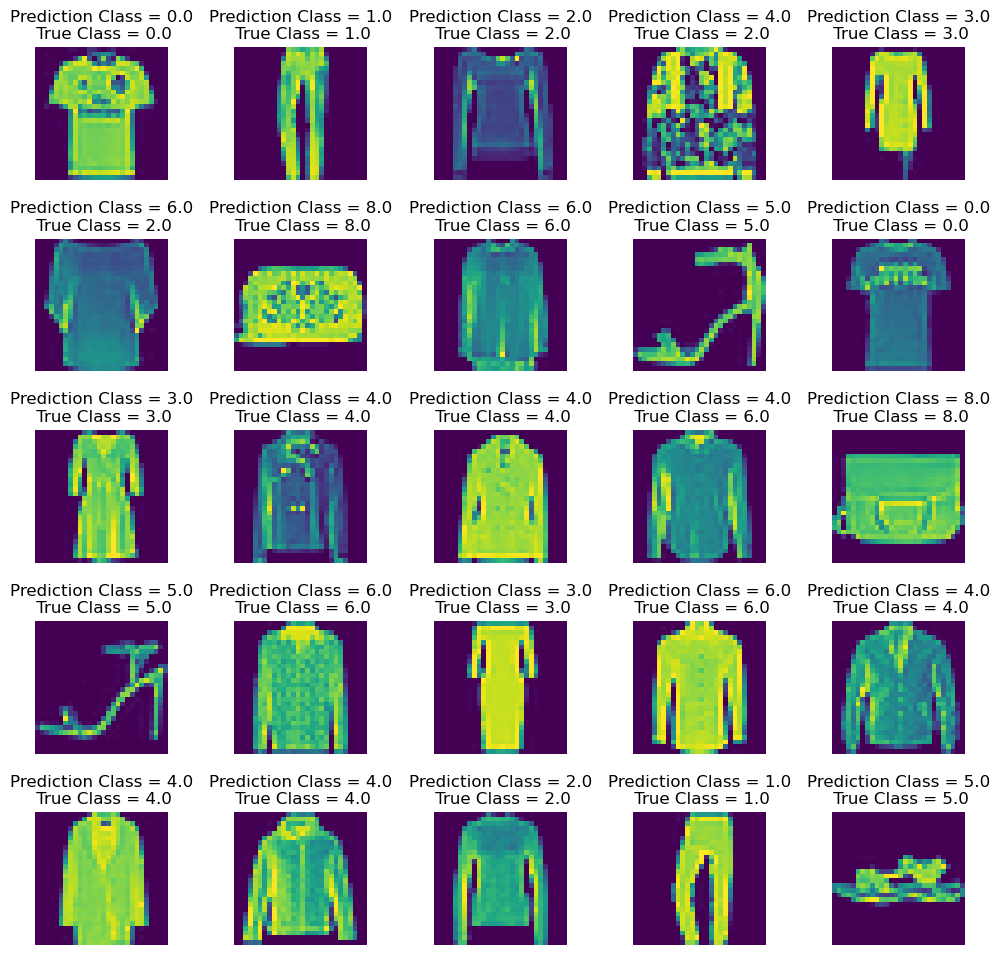

In [29]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<Axes: >

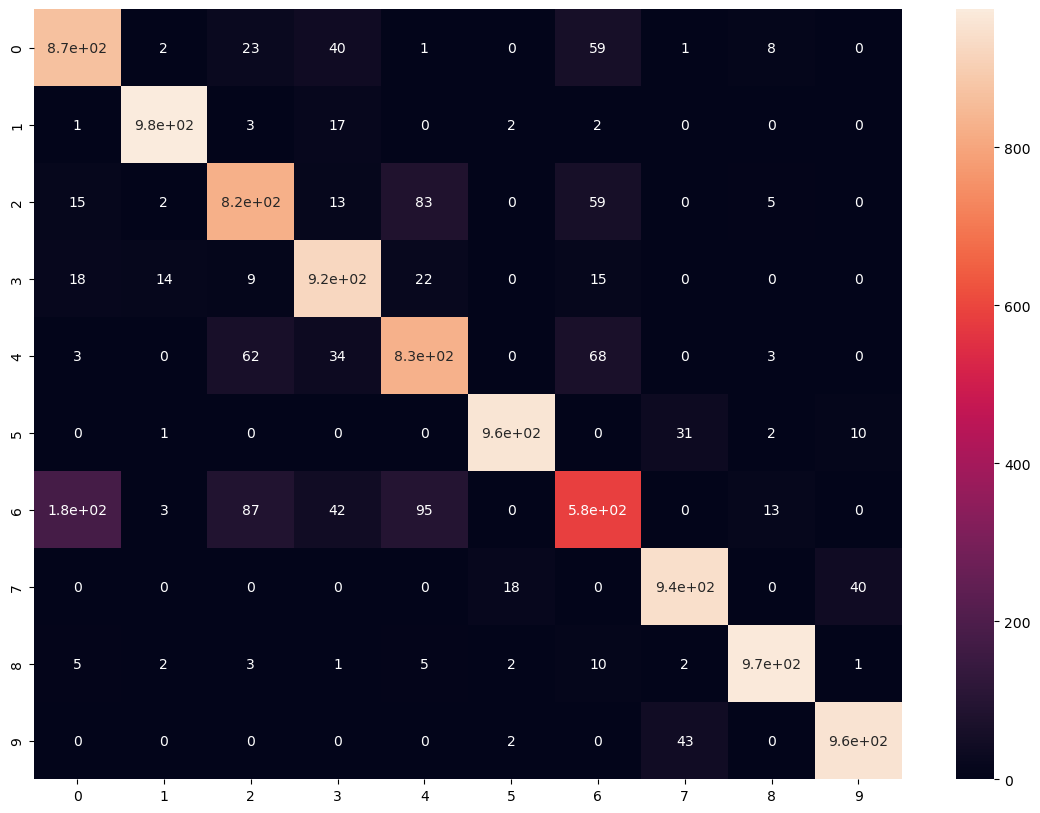

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [31]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.87      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.81      0.82      0.82      1000
     Class 3       0.86      0.92      0.89      1000
     Class 4       0.80      0.83      0.82      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.73      0.58      0.65      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



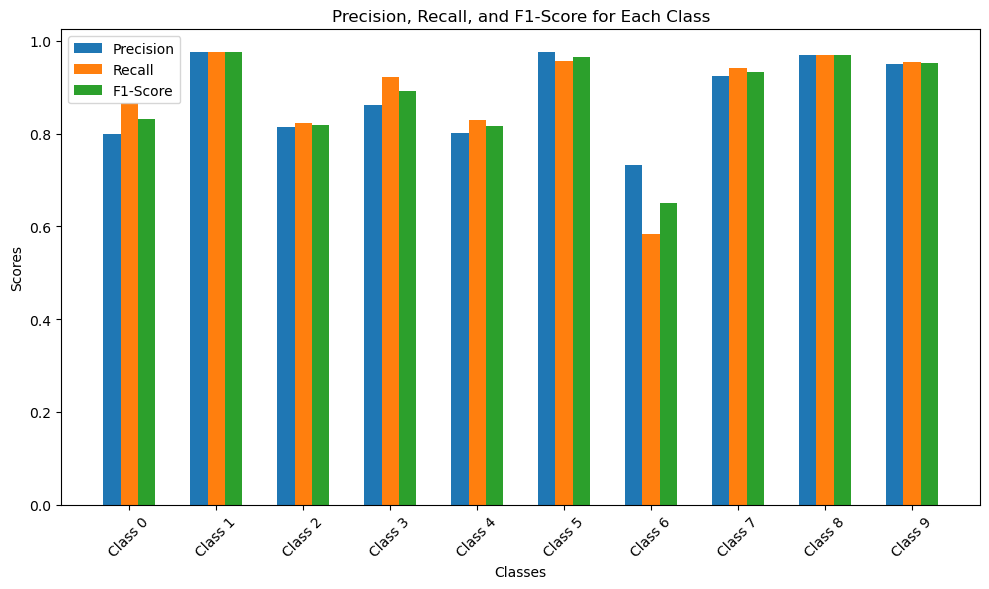

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Obtain classification report
report = classification_report(y_test, predicted_classes, target_names=target_names, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [report[target_name]['precision'] for target_name in target_names]
recall = [report[target_name]['recall'] for target_name in target_names]
f1_score = [report[target_name]['f1-score'] for target_name in target_names]

# Create a bar plot
x = np.arange(len(target_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(target_names)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


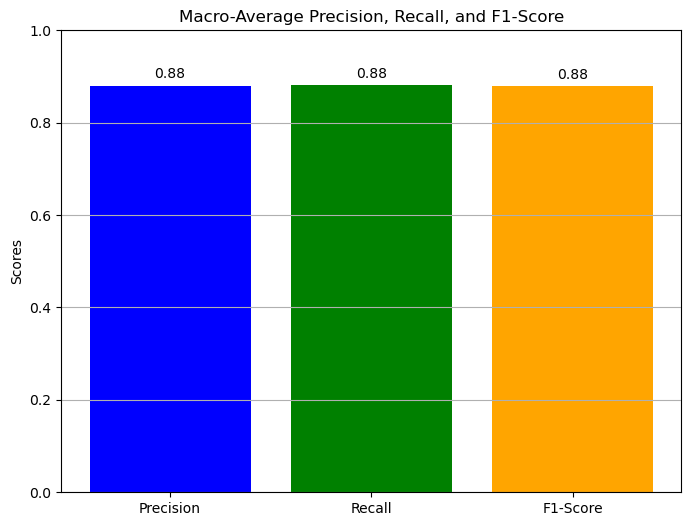

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Obtain classification report
report = classification_report(y_test, predicted_classes, target_names=target_names, output_dict=True)

# Extract macro-average precision, recall, and F1-score
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1_score = report['macro avg']['f1-score']

# Create a bar plot
metrics = ['Precision', 'Recall', 'F1-Score']
values = [macro_precision, macro_recall, macro_f1_score]

fig, ax = plt.subplots(figsize=(8, 6))
bar = ax.bar(metrics, values, color=['blue', 'green', 'orange'])

ax.set_ylabel('Scores')
ax.set_title('Macro-Average Precision, Recall, and F1-Score')
ax.set_ylim(0, 1)  # Set y-axis limit from 0 to 1 for scores
ax.grid(axis='y')

# Add labels on top of each bar
for rect in bar:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [36]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Calculate the accuracy for each class
accuracies = []
for i in range(num_classes):
    true_positive = cm[i, i]
    total = np.sum(cm[i, :])
    accuracy = true_positive / total
    accuracies.append(accuracy)

print("Accuracy for each class:")
for i, accuracy in enumerate(accuracies):
    print(f"Class {i}: {accuracy}")


Accuracy for each class:
Class 0: 0.866
Class 1: 0.975
Class 2: 0.823
Class 3: 0.922
Class 4: 0.83
Class 5: 0.956
Class 6: 0.584
Class 7: 0.942
Class 8: 0.969
Class 9: 0.955


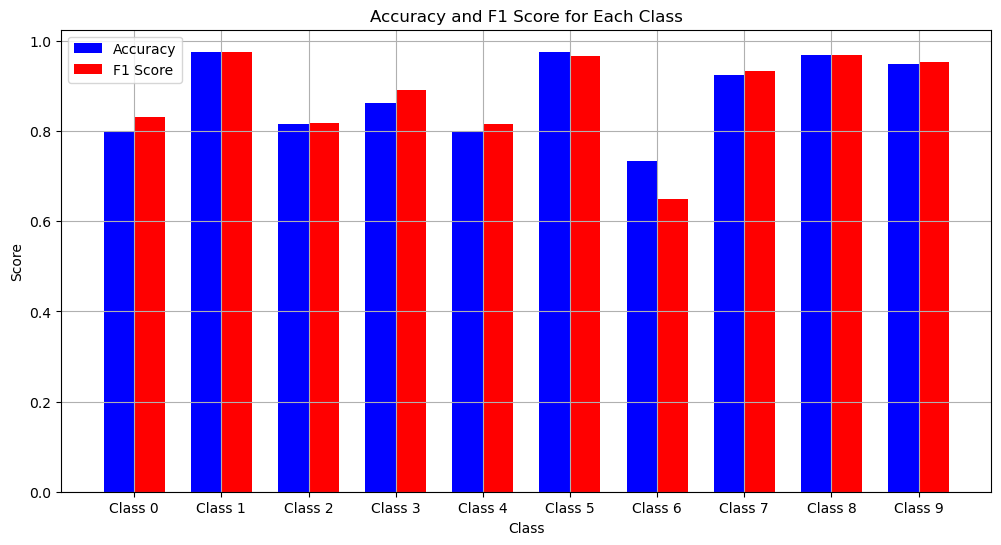

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=target_names, output_dict=True)

# Extract accuracies and F1 scores for each class
accuracies = [report[name]['precision'] for name in target_names]
f1_scores = [report[name]['f1-score'] for name in target_names]

# Plot the accuracy and F1 score for each class
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(num_classes)

plt.bar(index, accuracies, bar_width, label='Accuracy', color='b')
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='r')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score for Each Class')
plt.xticks(index + bar_width / 2, [f'Class {i}' for i in range(num_classes)])
plt.legend()
plt.grid(True)
plt.show()


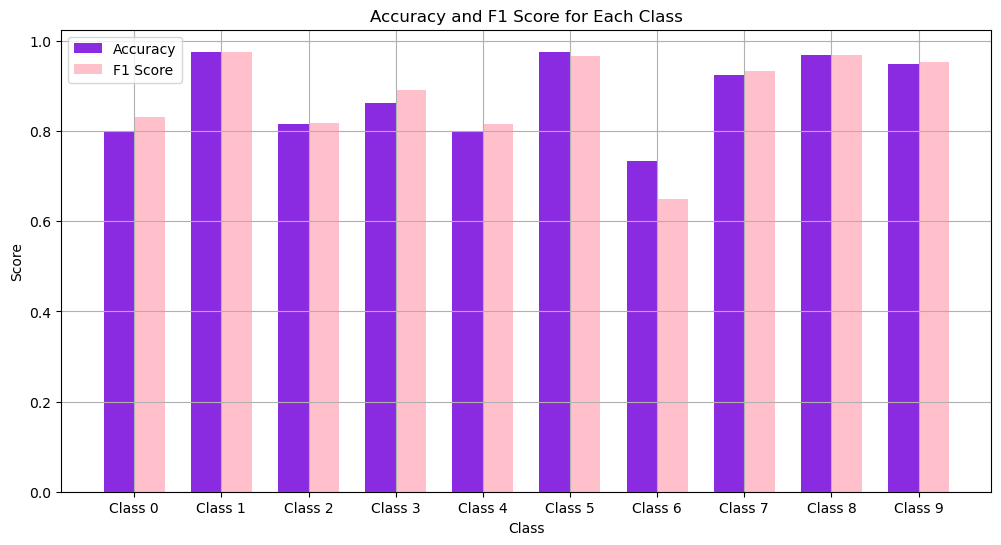

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=target_names, output_dict=True)

# Extract accuracies and F1 scores for each class
accuracies = [report[name]['precision'] for name in target_names]
f1_scores = [report[name]['f1-score'] for name in target_names]

# Plot the accuracy and F1 score for each class
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(num_classes)

violet_color = '#8A2BE2'
pink_color = '#FFC0CB'

plt.bar(index, accuracies, bar_width, label='Accuracy', color=violet_color)
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color=pink_color)

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score for Each Class')
plt.xticks(index + bar_width / 2, [f'Class {i}' for i in range(num_classes)])
plt.legend()
plt.grid(True)
plt.show()


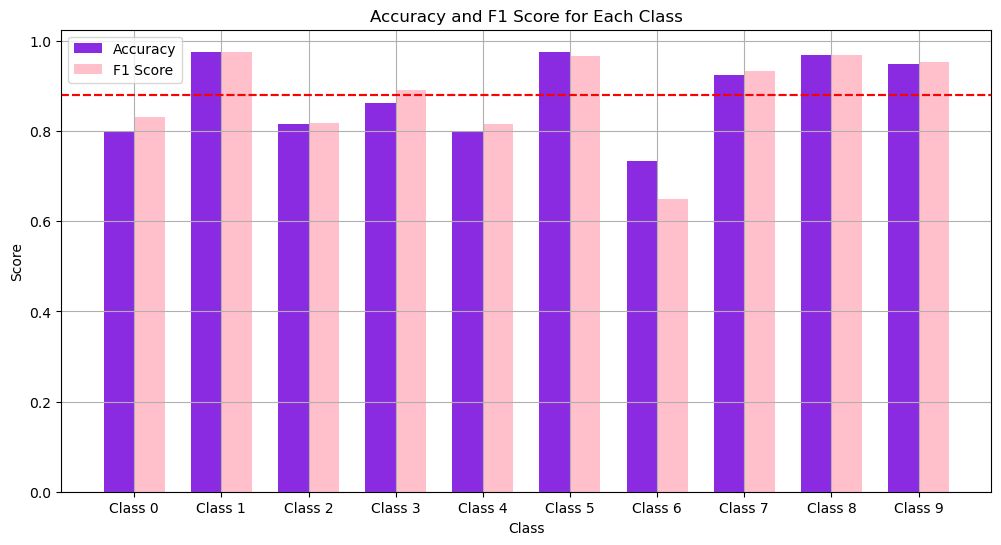

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=target_names, output_dict=True)

# Extract accuracies and F1 scores for each class
accuracies = [report[name]['precision'] for name in target_names]
f1_scores = [report[name]['f1-score'] for name in target_names]

# Calculate the average accuracy and F1 score
average_accuracy = np.mean(accuracies)
average_f1_score = np.mean(f1_scores)

# Plot the accuracy and F1 score for each class
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(num_classes)

violet_color = '#8A2BE2'
pink_color = '#FFC0CB'
red_color = 'red'

plt.bar(index, accuracies, bar_width, label='Accuracy', color=violet_color)
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color=pink_color)

# Plot the average accuracy and F1 score
plt.axhline(y=average_accuracy, color=red_color, linestyle='--')
plt.axhline(y=average_f1_score, color=red_color, linestyle='--')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Accuracy and F1 Score for Each Class')
plt.xticks(index + bar_width / 2, [f'Class {i}' for i in range(num_classes)])
plt.legend()
plt.grid(True)
plt.show()
